            ***PROJECT REPORT : INSIGHTS FROM AMCAT EDA ANALYSIS***

**1.Introduction**

The aim of this project is to conduct an exploratory data analysis (EDA) of the AMCAT dataset to derive insights regarding the performance and attributes of candidates. This analysis focuses on understanding the distribution of scores, the relationships between categorical and numerical variables, and identifying any patterns or trends that can inform decision-making.

**2.Data Overview**

The AMCAT dataset consists of several features related to candidates' performance on the AMCAT assessment. The key columns include:

DOB: Date of Birth

DOJ: Date of Joining

DOL: Date of Leaving or Present

Specialization: Area of study

Gender: Gender of the candidates

**3.Data Cleaning**

Data cleaning involved the following steps:
Handling Missing Values: Checked for and imputed missing values where necessary.

Date Formatting: Converted date columns to the appropriate datetime format.

Data Type Conversion: Ensured numerical columns are in the correct format for analysis.

Specialization Encoding: Replaced detailed specialization names with standardized abbreviations.

**4.Exploratory Data Analysis**


*Univariate Analysis*

Distribution of Scores: The distribution of AMCAT scores was analyzed using histograms and box plots.

Categorical Variables: Count plots were created to visualize the frequency of candidates across various specializations and genders.

*Bivariate Analysis*

Box Plots: Created box plots to visualize the relationship between AMCAT scores and categorical variables such as specialization and gender.

Correlation Analysis: Computed the correlation matrix to identify relationships between numerical features.

**5.Key Insights**

Score Distribution: The distribution of AMCAT scores showed a normal distribution with some outliers at the high end.

Impact of Specialization: Candidates from certain specializations (e.g., Computer Science) tend to have higher average scores compared to others.

Gender Differences: There were no significant differences in scores between male and female candidates, indicating parity in performance.

**6.Conclusion**

The exploratory data analysis of the AMCAT dataset provided valuable insights into candidates' performance and demographic attributes. These insights can be used to inform future assessments, improve candidate training, and enhance the overall AMCAT evaluation process.

STEP 1 - IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

STEP 2 - READING AND ANALYZING THE DATA

In [2]:
data=pd.read_excel("C:/Users/Admin/Desktop/AMCAT/train.xlsx")

In [3]:
del data['Unnamed: 0']

In [4]:
# To display the top 5 observations of the dataset
data.head()
# To display the below 5 observations of the dataset
data.tail()
#To understand the data type and information about data
data.info()
# description of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min    1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max    1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

                                 DOB  10percentage  12graduation  \
count                           3998   3998.000000   3998.000000   
mean   1990-12-06 06:01:15.637819008     77.925443   2008.087544   
min              1977-10-30 00:00:00     43.000000   1995.000000   
25%              1989-11-16 06:00:00     71.680000   2007.000000   
50%              1991-03-07 12:00:00     79.150000   2008.000000   
75%              1992-03-13 18:00:00     85.670000   2009.000000   
max              1997-05-27 00:00:00     97.760000   2013.000000   
std                              NaN      9.850162      1.653599   

       12percentage     CollegeID  CollegeTier   collegeGPA  ...  \
count   3998.000000   3998.000000  3998.000000  3998.000000  ...   
mean      74.466366   5156.851426     1.925713    71.486171  ...   
min       40.000000      2.000000     1.000000     6.450000  ...   
25%       66.000000    494.000000     2.000000    66.407500  ...   
50%       74.400000   3879.000000     2.000000    71.720000  ...   
75%       82.600000   8818.000000     2.000000    76.327500  ...   
max       98.700000  18409.000000     2.000000    99.930000  ...   
std       10.999933   4802.261482     0.262270     8.167338  ...   

       ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count      3998.000000     3998.000000     3998.000000  3998.000000   
mean         90.742371       22.974737       16.478739    31.851176   
min          -1.000000       -1.000000       -1.000000    -1.000000   
25%          -1.000000       -1.000000       -1.000000    -1.000000   
50%          -1.000000       -1.000000       -1.000000    -1.000000   
75%          -1.000000       -1.000000       -1.000000    -1.000000   
max         715.000000      623.000000      676.000000   548.000000   
std         175.273083       98.123311       87.585634   104.852845   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   
std      36.658505           1.028666       0.941782      0.951471   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  
std       1.007580               1.008075  

[8 rows x 29 columns]

CHECK FOR DUPLICATION

In [5]:
# To identify the continuous and categorical columns in the data
data.nunique()
# To get the number of missing records in each column
data.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

STEP 3 - DATA CLEANING

In [6]:
data['DOJ']=pd.to_datetime(data['DOJ'])
data['DOL'].replace(to_replace='present',value=pd.Timestamp.now(),inplace=True)
data['DOL']=pd.to_datetime(data['DOL'])
data['Tenure'] = (data['DOL']-data['DOJ'])/np.timedelta64(1, 'm')
data['Tenure'] = data['Tenure'].astype(int)
data['Tenure'].unique()

array([ 6511447,  5853367,  5460247,  6995287,   525600,   393120,
        5942647,  5417047,  2103840,  1666080,  5722327,  5677687,
        5898007,  5327767,   570240,   217440,   964800,   701280,
         787680,   349920,  6378967,  1445760,   175680,    84960,
        -308160,  6774967,  5810167,  5284567,  5152087,  5592727,
        6118327,  2365920,   394560,    89280,  5372407,  1533600,
         920160,  1139040,   879840,  5107447,  5022487,  5239927,
        6643927,   308160,  1883520,  5765527,   262080,  1052640,
         128160,  1402560,   264960,   790560,  4934647,  5504887,
         437760,   174240,    87840,  6818167,  4891447,   702720,
         129600,  6030487,  -177120,   613440,  1929600,  7170967,
          44640,  5985847,  5067127,   352800,   439200,  6468247,
        1840320,  7651927,   699840,  1313280,   655200,  6335767,
         172800,  6073687,   610560,  5548087,  7343767,  1051200,
         132480,   305280,  1972800,  -393120,   830880,  1095

In [7]:
#CREATING AGE COLUMN USING 'DOB' COLUMN
data['DOB']=pd.to_datetime(data['DOB'])

from datetime import datetime, date  
current_date = datetime.now()
# Calculate age in years
data['Age'] = (current_date - data['DOB']).dt.days / 365.25  # Using average days in a year
data['Age'] = data['Age'].astype(int)  # Convert to integer for whole years

# Check the unique values of 'Age'
unique_age = data['Age'].unique()

In [8]:
#ROWS WITH GRADUATION YEAR AS ZERO
pd.set_option('display.max_columns',None)
data[data['GraduationYear']==0]

ID  Salary        DOJ        DOL       Designation     JobCity  \
2664  794381  325000 2014-07-01 2015-07-01  systems engineer  Chandigarh   

     Gender        DOB  10percentage 10board  12graduation  12percentage  \
2664      m 1991-12-17          89.0    cbse          2010          85.2   

     12board  CollegeID  CollegeTier       Degree          Specialization  \
2664    cbse       8346            2  B.Tech/B.E.  mechanical engineering   

      collegeGPA  CollegeCityID  CollegeCityTier   CollegeState  \
2664       68.76           8346                0  Uttar Pradesh   

      GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  \
2664               0      695      655    680  0.755375                   -1   

      ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
2664                     -1               -1             446              -1   

      TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
2664           -1         -1             1.1336         0.3789       -0.2974   

      nueroticism  openess_to_experience  Tenure  Age  
2664      -0.3612                 -1.244  525600   32

There is only one row with graduation year as ‘0’. It can be replaced with 2014 since the 12th graduation year is 2010 and DOJ is 2014.01

In [9]:
data['GraduationYear'].replace(to_replace = 0, value=2014,inplace = True)

In [10]:
data = pd.DataFrame({
    'Specialization': [
        'computer engineering', 
        'electronics and communication engineering', 
        'information technology', 
        'computer science & engineering', 
        'mechanical engineering', 
        'electronics and electrical engineering', 
        'computer networking', 
        'biomedical engineering', 
        'electronics', 
        'computer science',
        'chemical engineering',  # Additional specialization
        'aeronautical engineering'  # Additional specialization
    ]
})

# Updated dictionary for replacing specialization values
Domains = {
    'computer engineering': 'CS',
    'electronics and communication engineering': 'EE',
    'information technology': 'IT',
    'computer science & engineering': 'CS',
    'mechanical engineering': 'ME',
    'electronics and electrical engineering': 'EE',
    'computer networking': 'CS',
    'biomedical engineering': 'Other', 
    'electronics': 'EE',
    'computer science': 'CS',
    'chemical engineering': 'Chem',  # Added mapping
    'aeronautical engineering': 'AE',  # Added mapping
}

# Replace values in the 'Specialization' column
data['Specialization'] = data['Specialization'].str.strip()  # Remove leading/trailing spaces
data['Specialization'].replace(Domains, inplace=True)

# Display unique values in the 'Specialization' column
unique_specializations = data['Specialization'].unique()
print(unique_specializations)


['CS' 'EE' 'IT' 'ME' 'Other' 'Chem' 'AE']


In [11]:
data.describe(include='all').T

count unique top freq
Specialization    12      7  CS    4

In [12]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Specialization'], dtype='object')
Numerical Variables:
[]


Step 4 - UNIVARIATE ANALYSIS

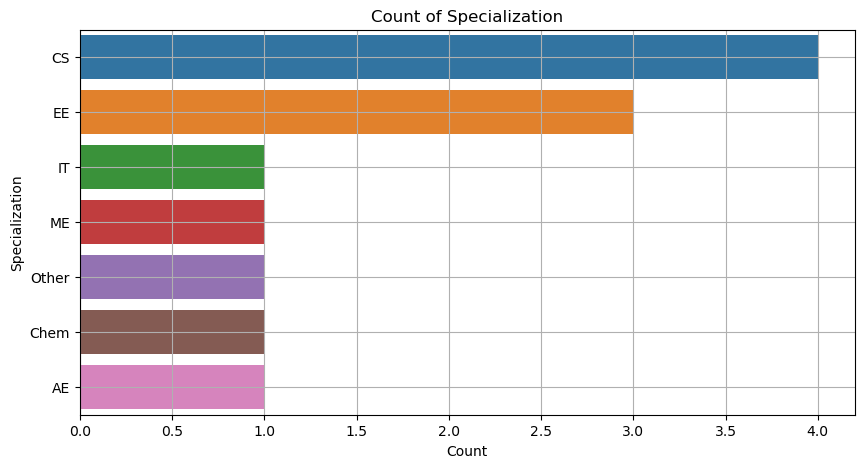

In [13]:
# For each numerical column, plot the distribution
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)  # Histogram with a Kernel Density Estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# For categorical columns, display the counts and a bar plot
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid()
    plt.show()

       ID   Salary        DOJ                  DOL               Designation  \
0  203097   420000 2012-06-01              present   senior quality engineer   
1  579905   500000 2013-09-01              present         assistant manager   
2  810601   325000 2014-06-01              present          systems engineer   
3  267447  1100000 2011-07-01              present  senior software engineer   
4  343523   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  12percentage         

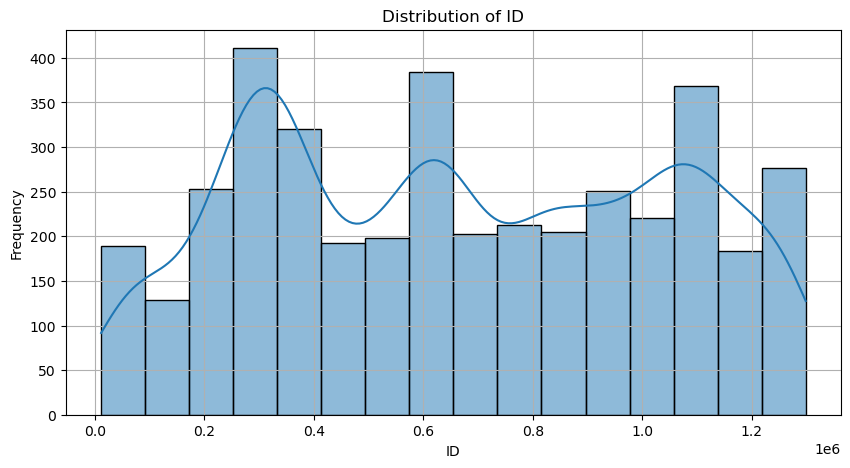

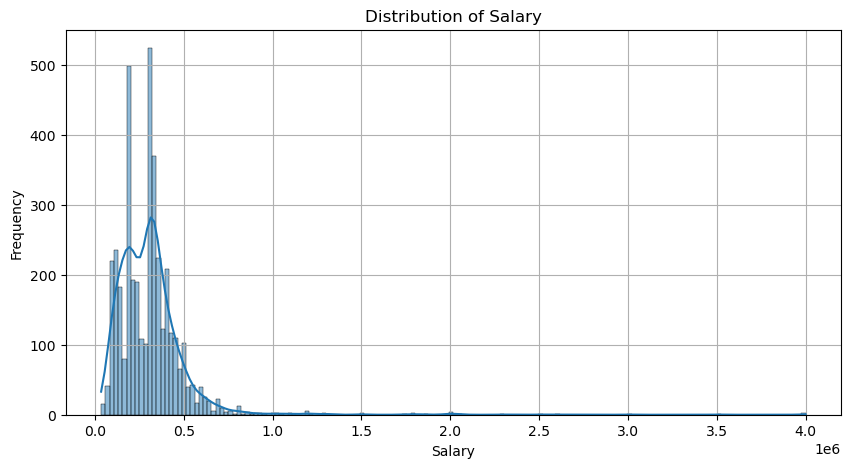

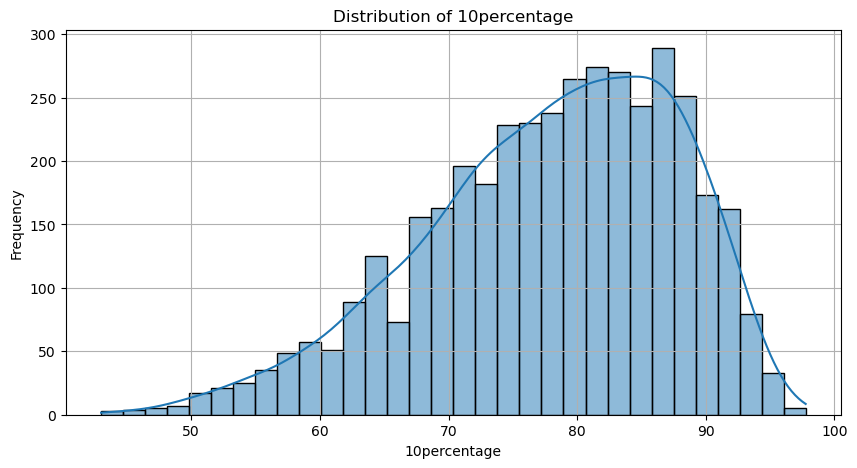

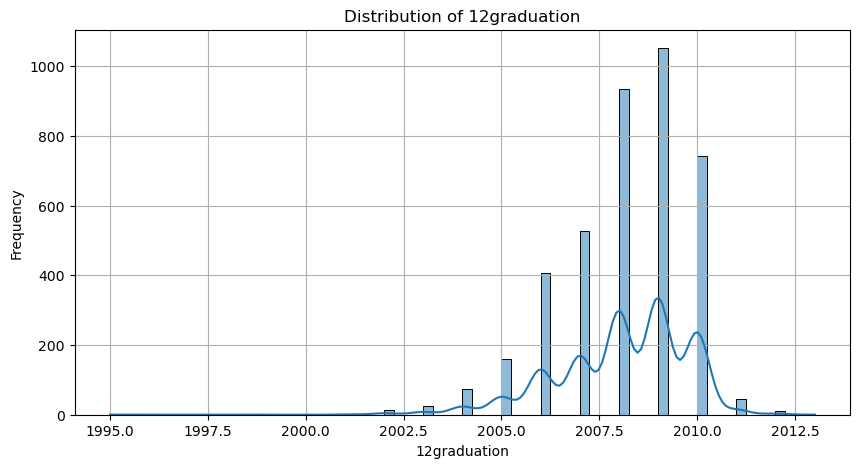

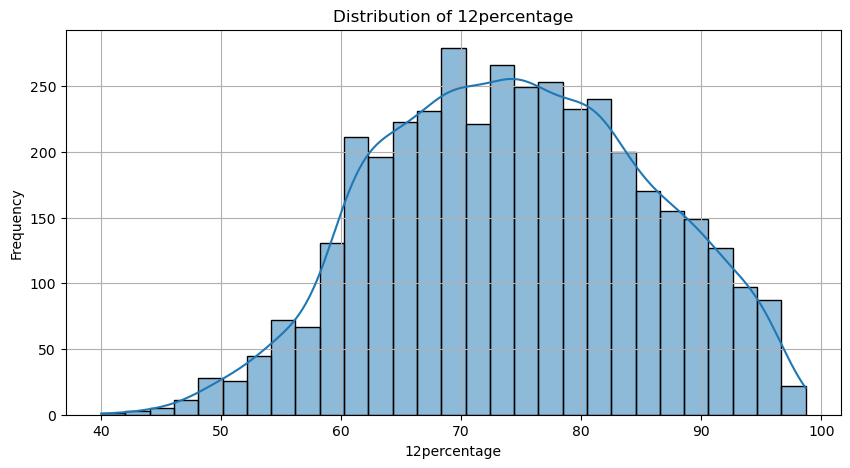

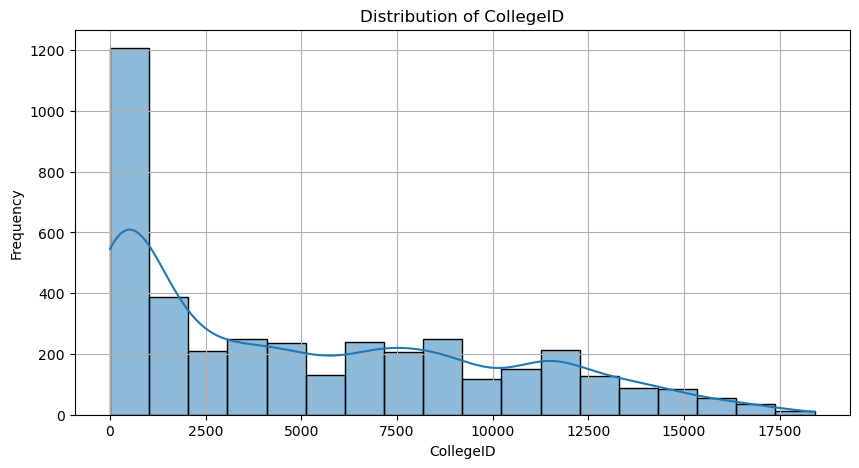

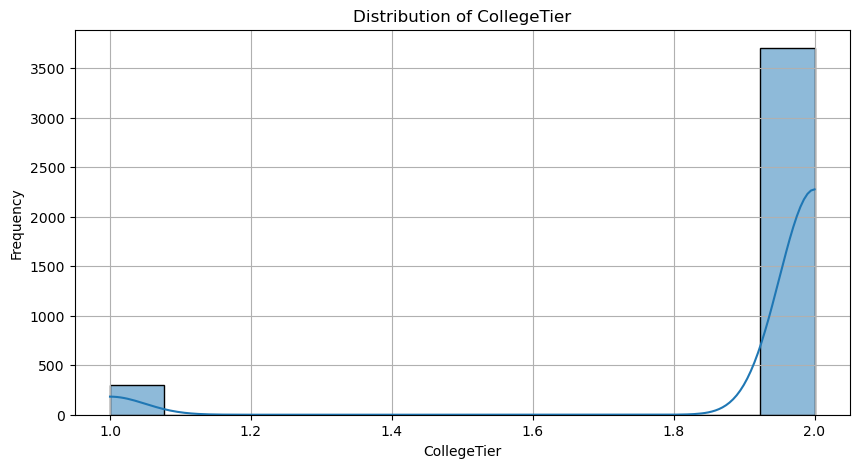

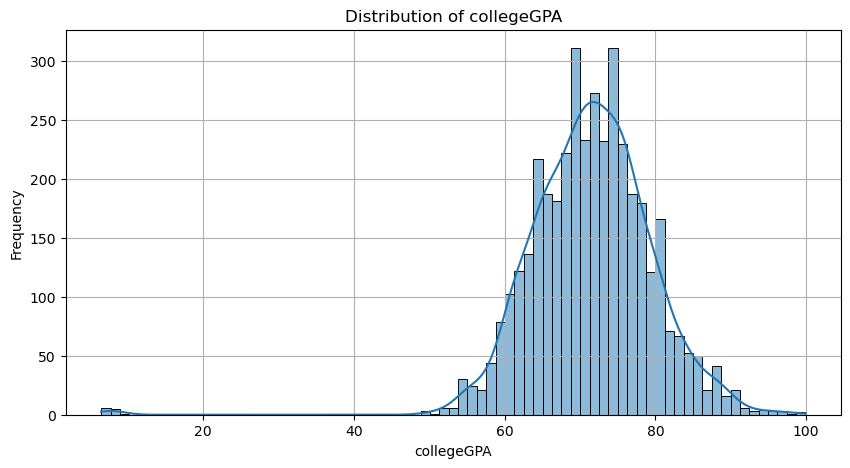

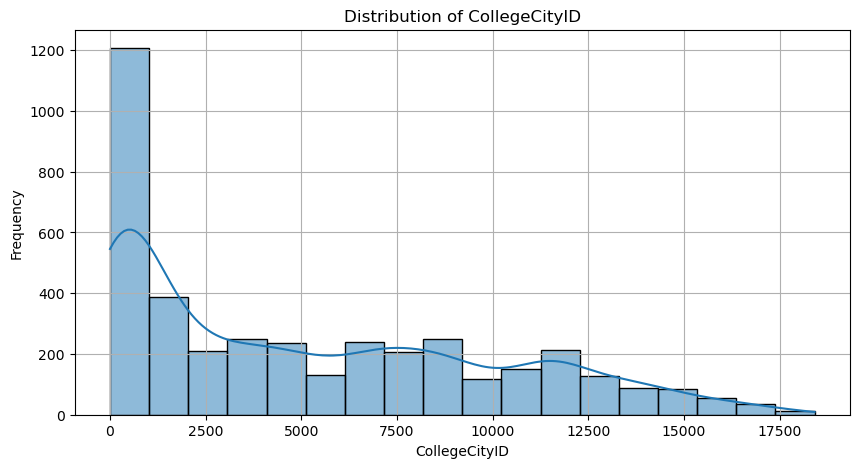

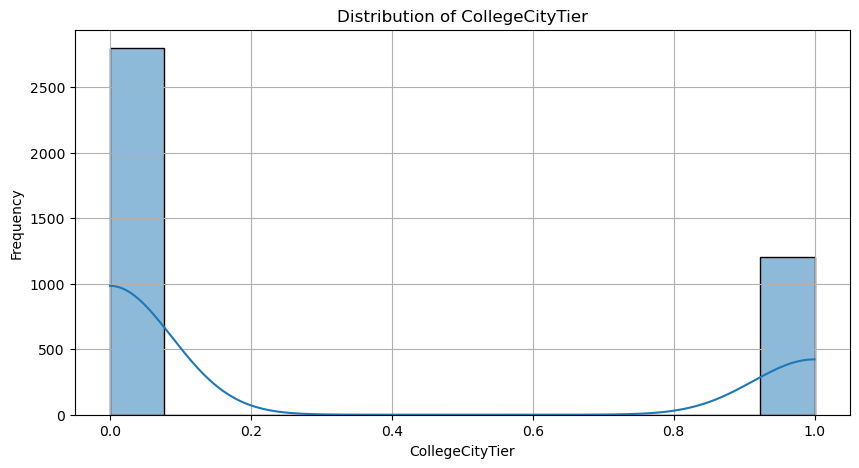

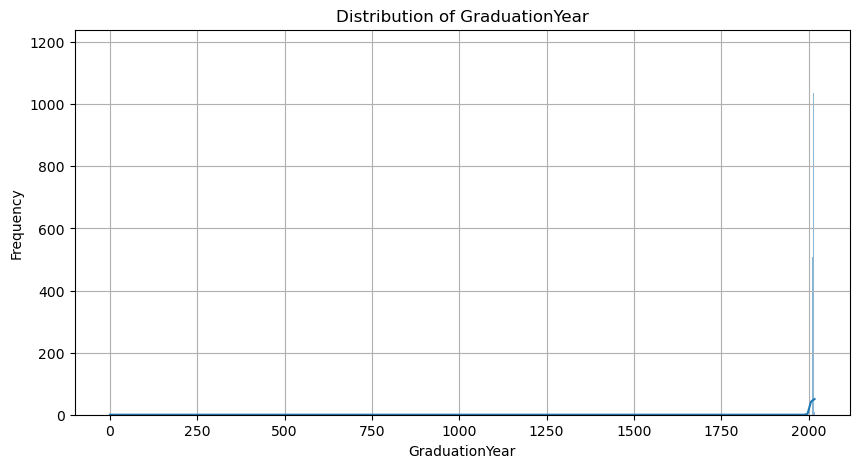

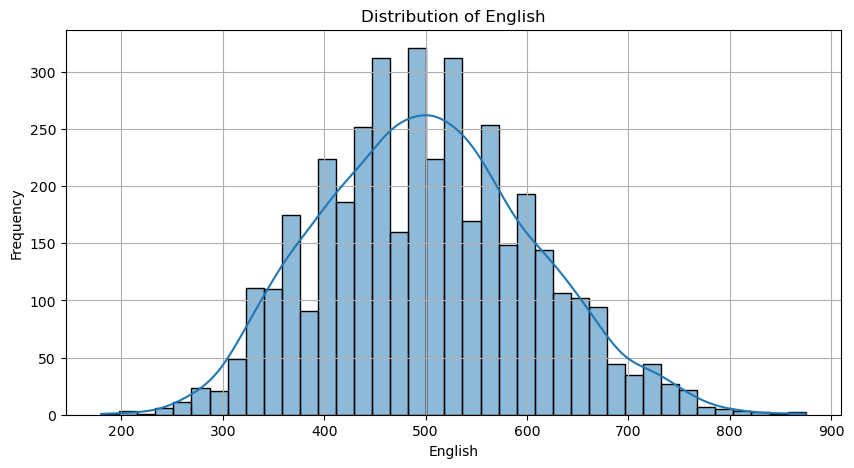

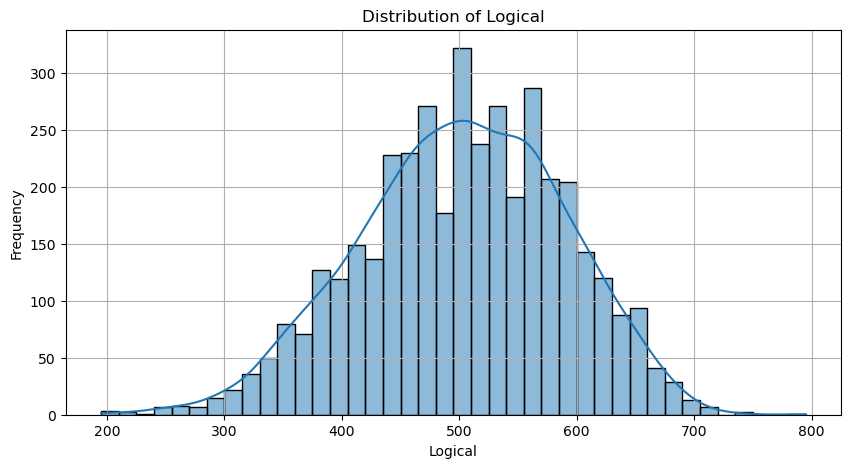

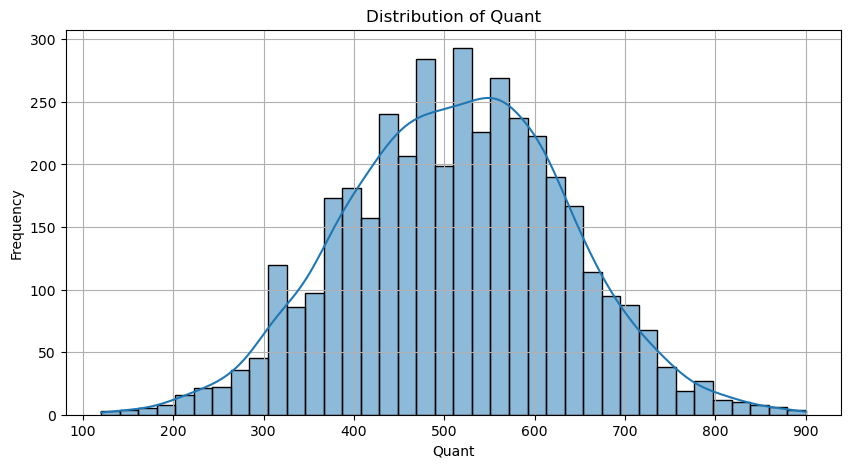

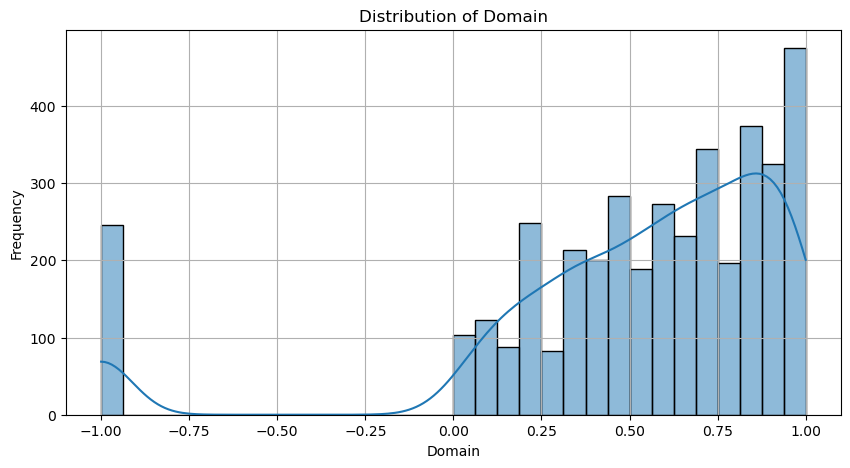

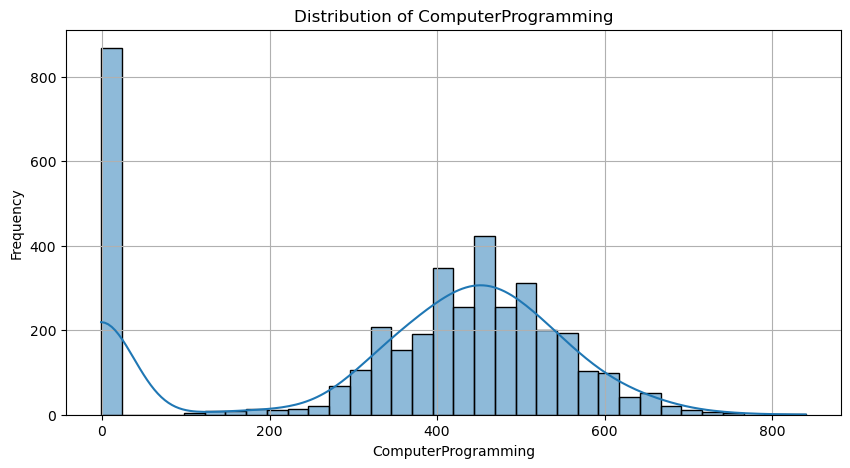

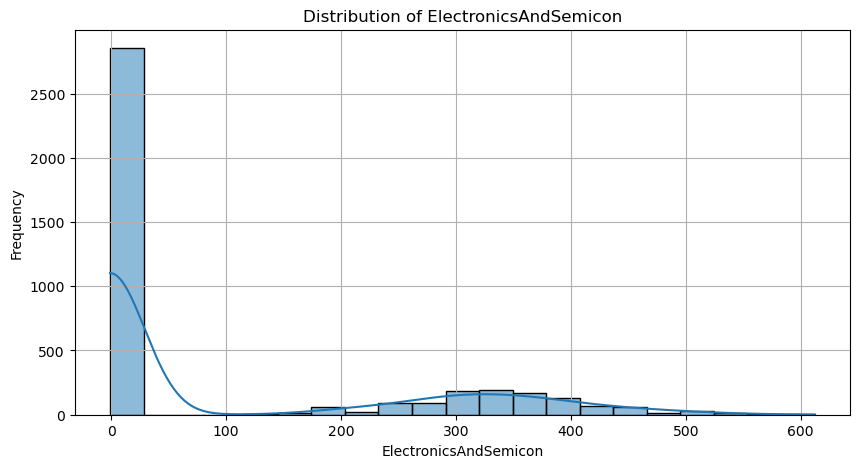

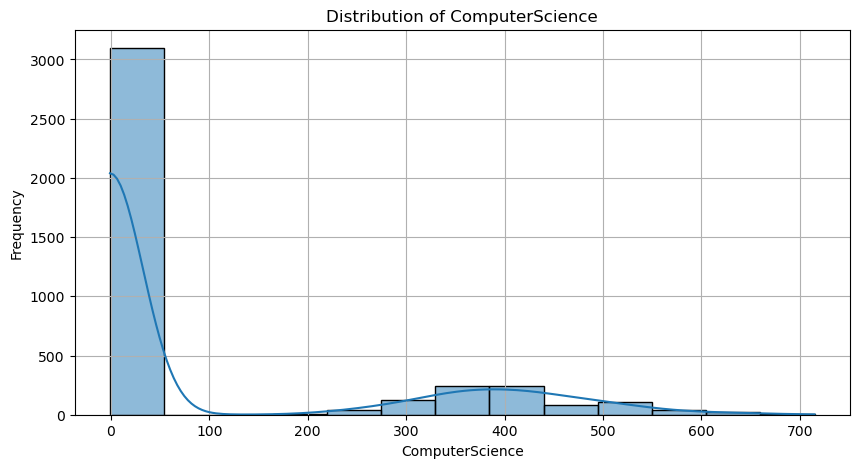

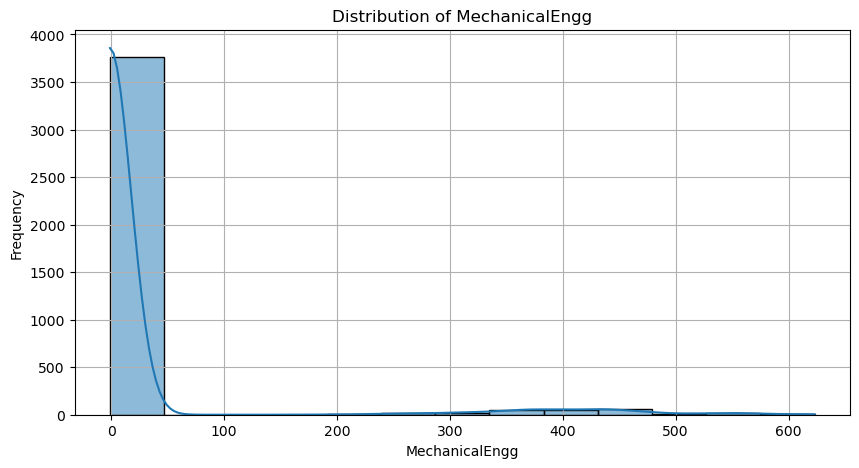

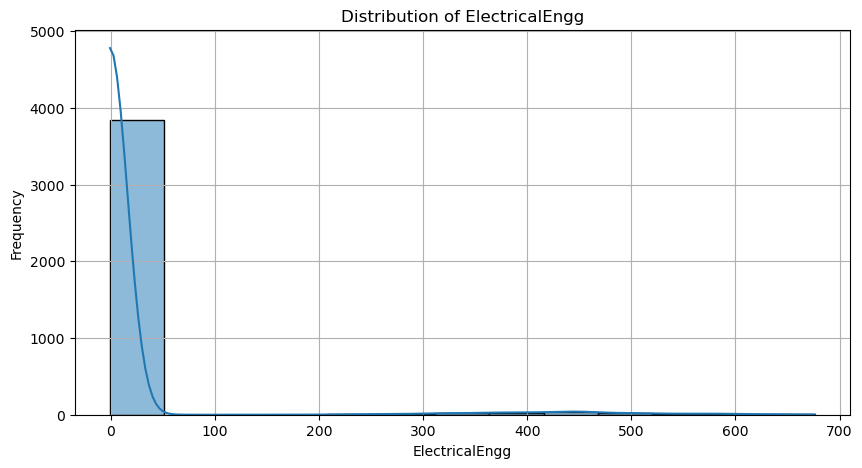

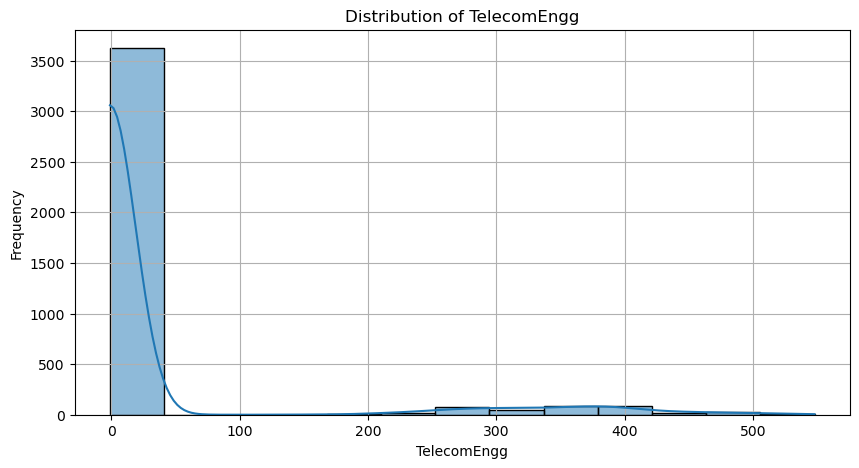

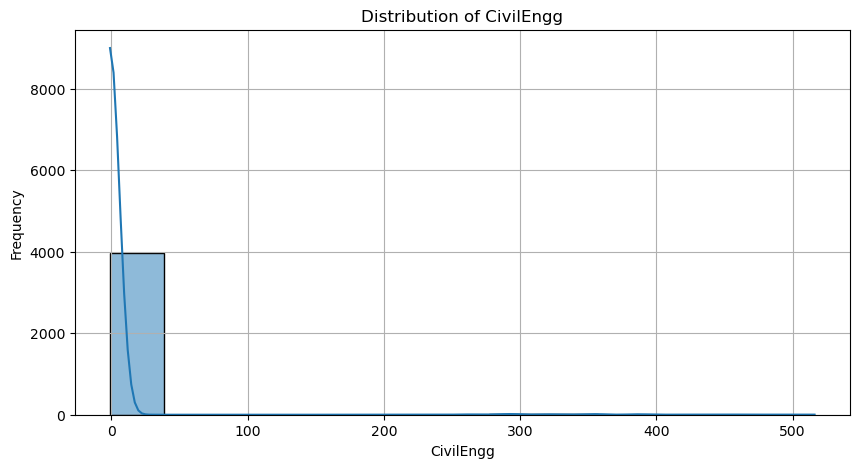

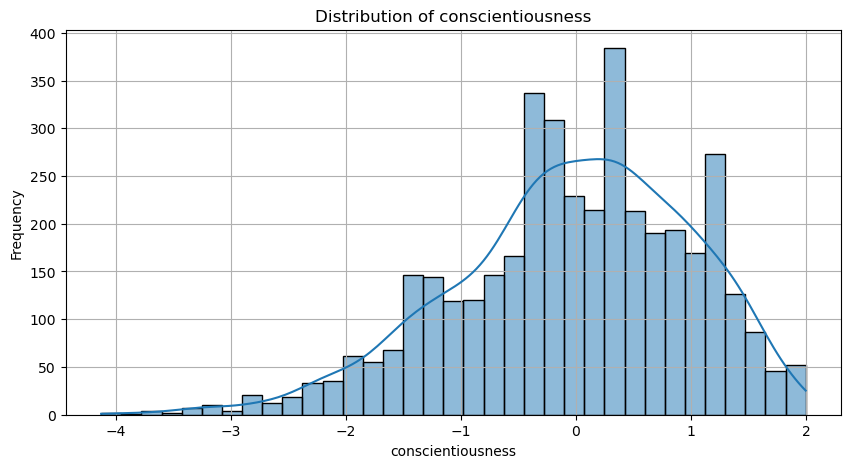

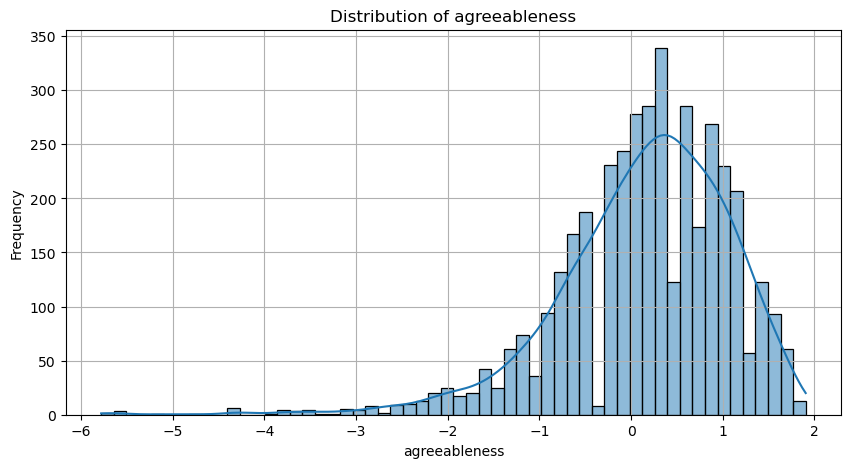

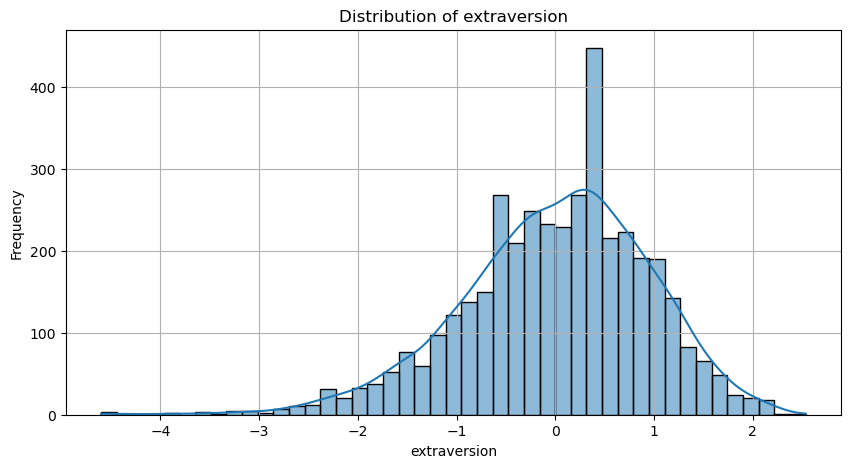

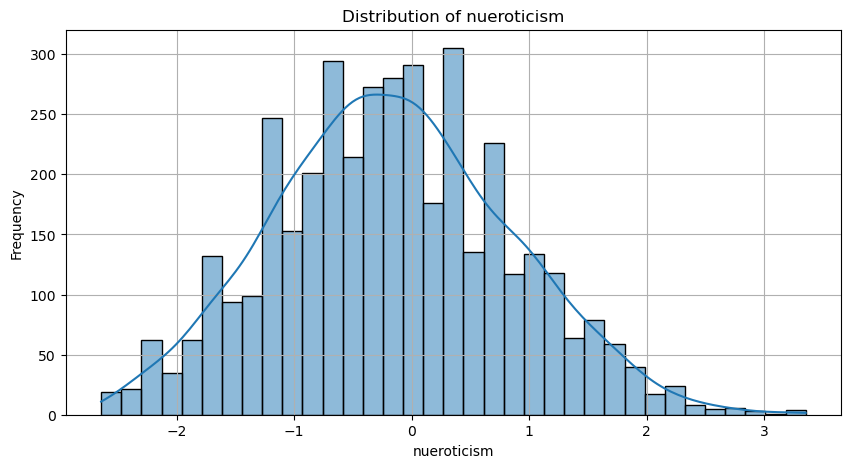

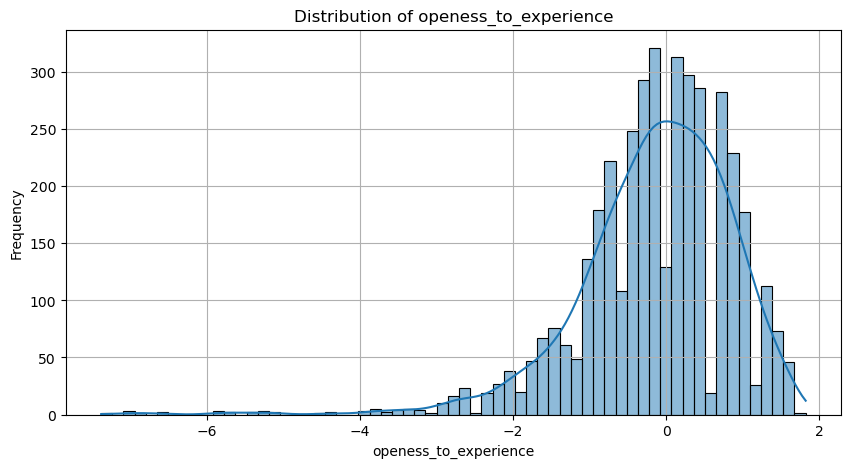

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AMCAT dataset
data = pd.read_excel('C:/Users/Admin/Desktop/AMCAT/train.xlsx')

del data['Unnamed: 0']
# Display the first few rows of the dataset
print(data.head())

# Get a summary of the dataset
print(data.describe(include='all'))

# For each numerical column, plot the distribution
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)  # Histogram with a Kernel Density Estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

ID: [203097 579905 810601 ... 355888 947111 324966]
Salary: [ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  490000 1300000

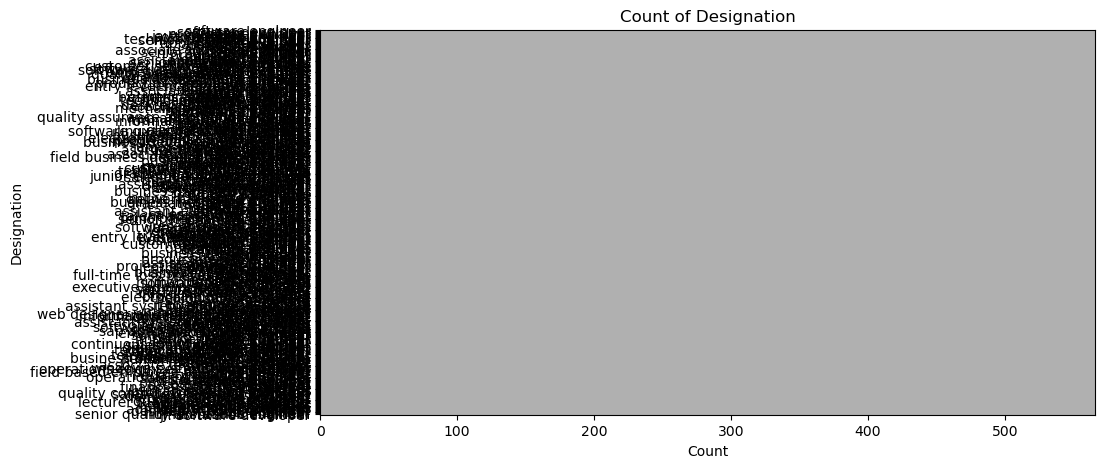

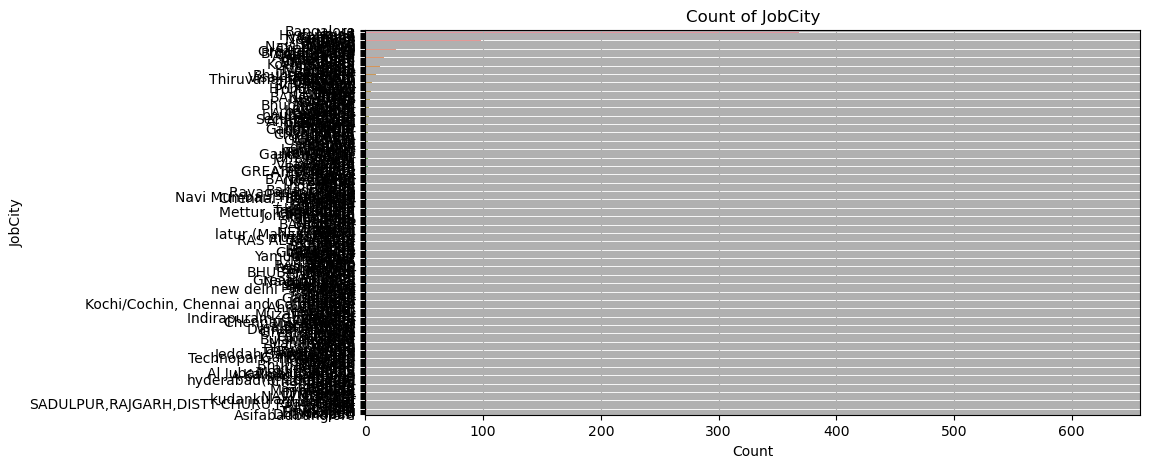

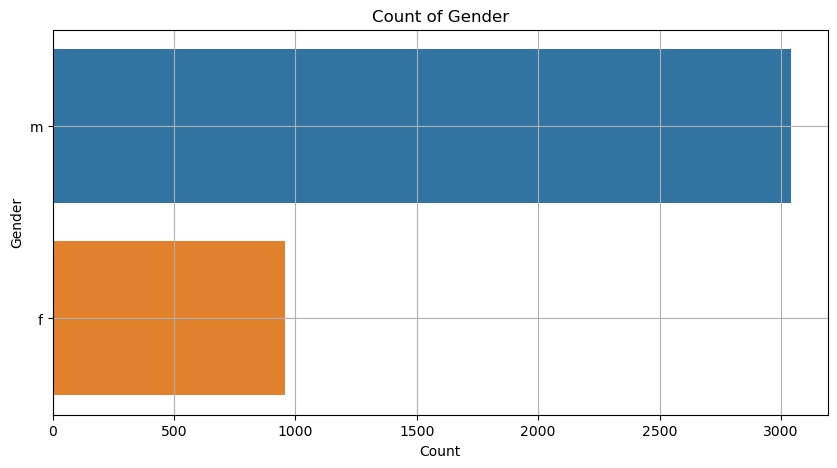

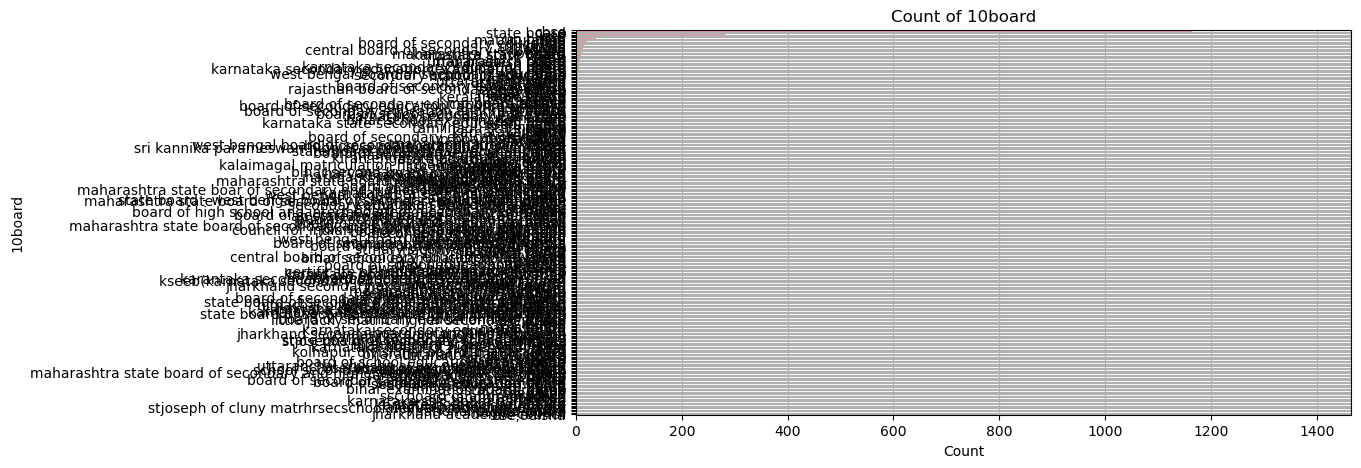

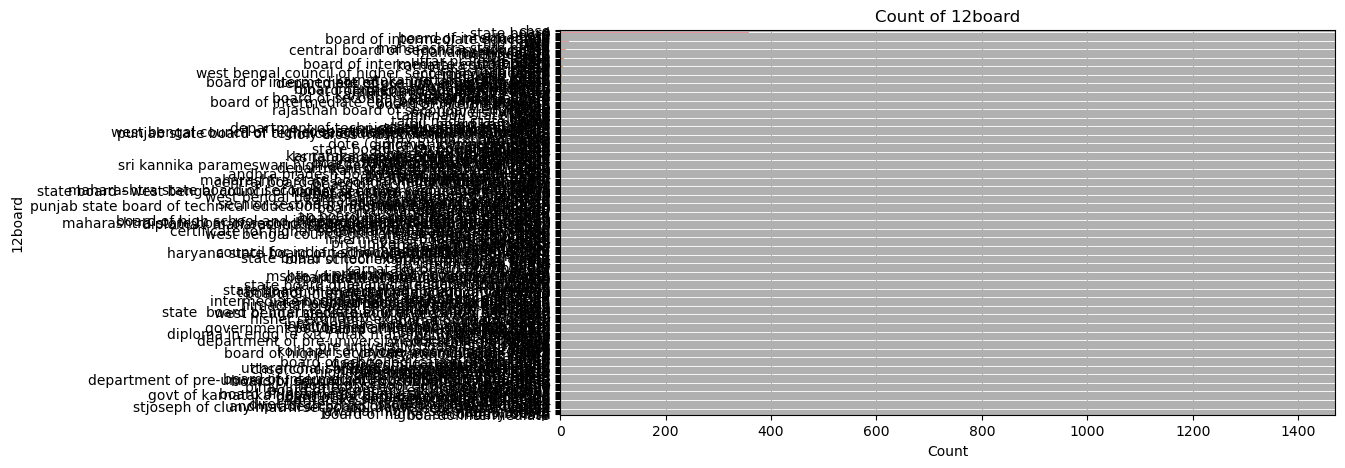

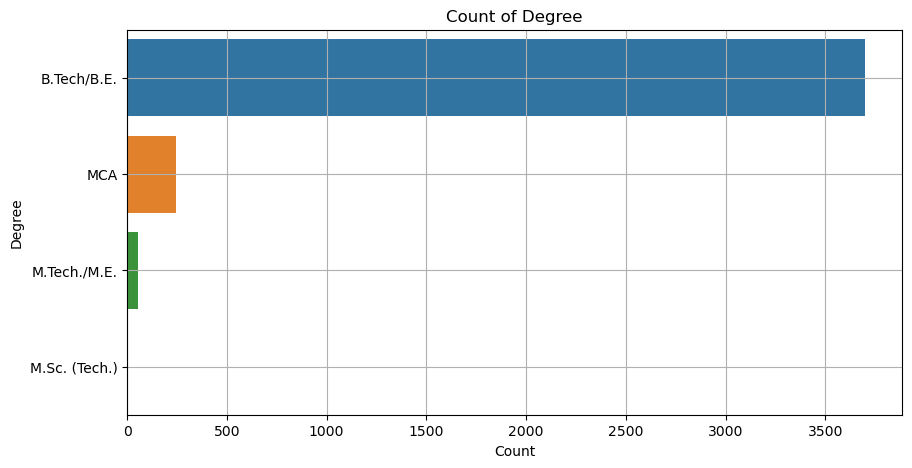

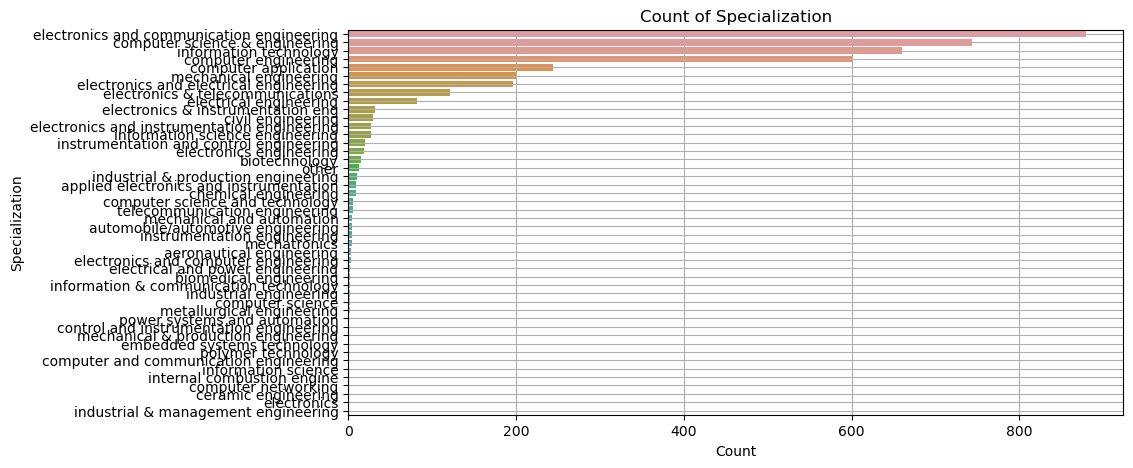

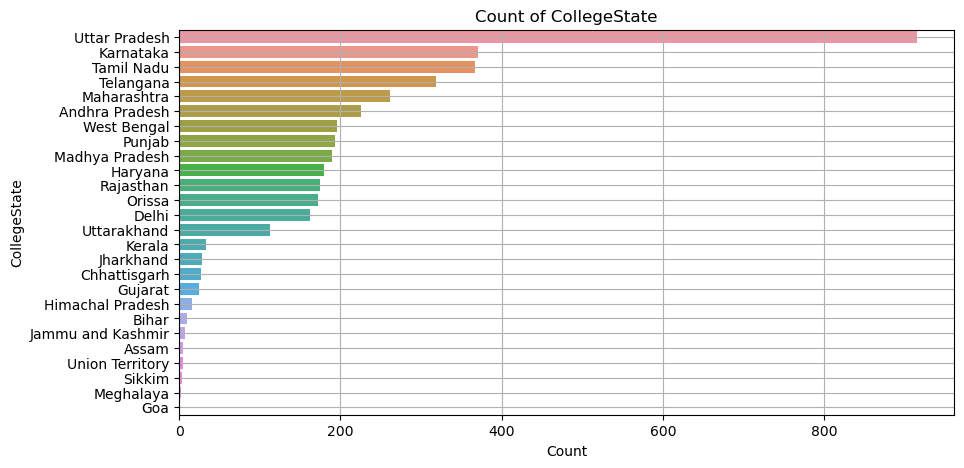

In [15]:
# Check for columns with problematic entries
for col in data.columns:
    print(f"{col}: {data[col].unique()}")  # Display unique values in each column

# Replace 'present' in date columns if necessary
# For example, if you have a column 'DOL' (Date of Leaving) that contains 'present'
if 'DOL' in data.columns:
    data['DOL'].replace(to_replace='present', value=pd.Timestamp.now(), inplace=True)

# Convert all columns to categorical where applicable
categorical_cols = data.select_dtypes(include=['object']).columns

# For each categorical column, display the counts and a bar plot
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid()
    plt.show()

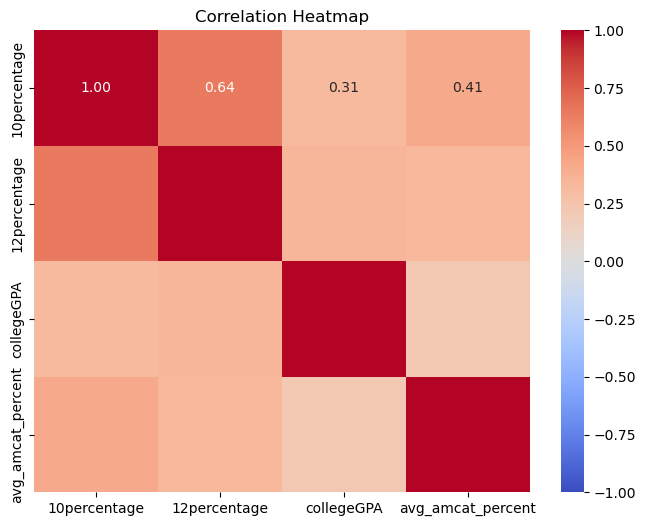

In [16]:
# defining the tests available on the amcat platform

amcat_test_scores = data[['English','Logical','Quant','ComputerProgramming','ElectronicsAndSemicon',
                   'ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']]

amcat_test_scores['avg'] = (amcat_test_scores['English'] + amcat_test_scores['Logical'] + amcat_test_scores['Quant'])/3
amcat_test_scores['avg_amcat_percent'] = (amcat_test_scores['avg']/900)*100
amcat_test_scores['10percentage'] = data['10percentage']
amcat_test_scores['12percentage'] = data['12percentage']
amcat_test_scores['collegeGPA'] = data['collegeGPA']

columns_to_plot = amcat_test_scores[['10percentage', '12percentage', 'collegeGPA', 'avg_amcat_percent']]


correlation_matrix = columns_to_plot.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Step 5 - BIVARIATE ANALYSIS

In [17]:
# Display data types of columns
print(data.dtypes)

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [18]:
# Select only the numerical columns for correlation analysis
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

                             ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.247294      0.044547      0.673102   
Salary                -0.247294  1.000000      0.177373     -0.161383   
10percentage           0.044547  0.177373      1.000000      0.269957   
12graduation           0.673102 -0.161383      0.269957      1.000000   
12percentage           0.007069  0.170254      0.643378      0.259166   
CollegeID              0.284540 -0.118690      0.021082      0.254021   
CollegeTier            0.035160 -0.179332     -0.126042      0.027691   
collegeGPA             0.047144  0.130103      0.312538      0.086001   
CollegeCityID          0.284540 -0.118690      0.021082      0.254021   
CollegeCityTier       -0.035977  0.015384      0.116707     -0.003016   
GraduationYear         0.027539 -0.010053     -0.013799      0.014457   
English                0.135505  0.178219      0.350780      0.147925   
Logical                0.102215  0.179275      0.31

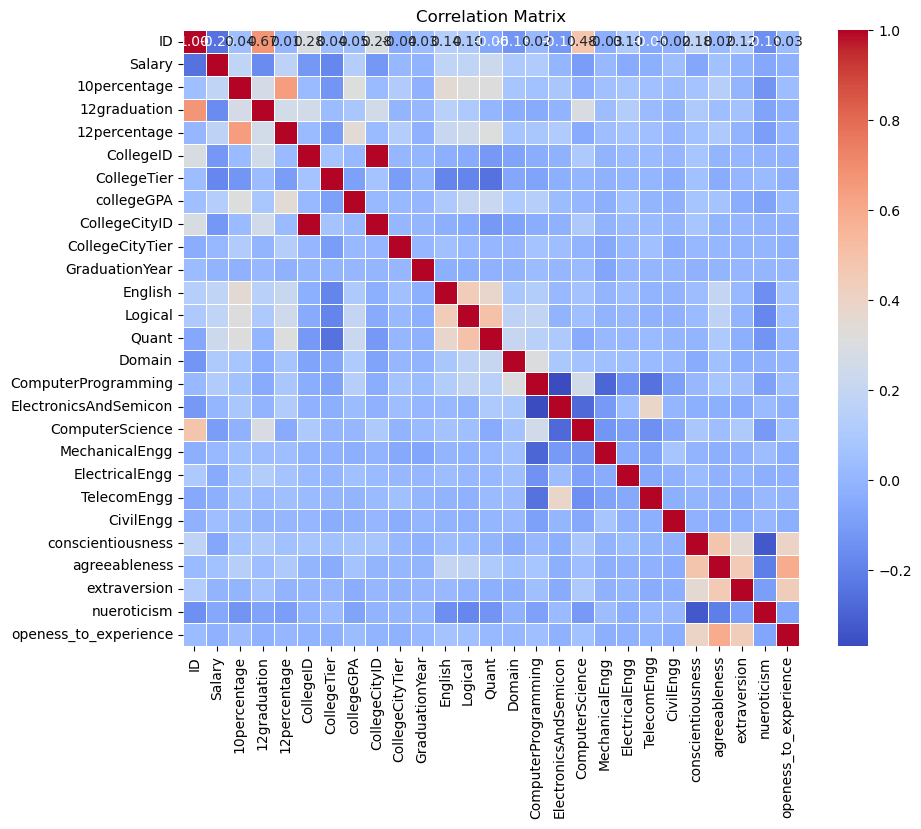

In [19]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

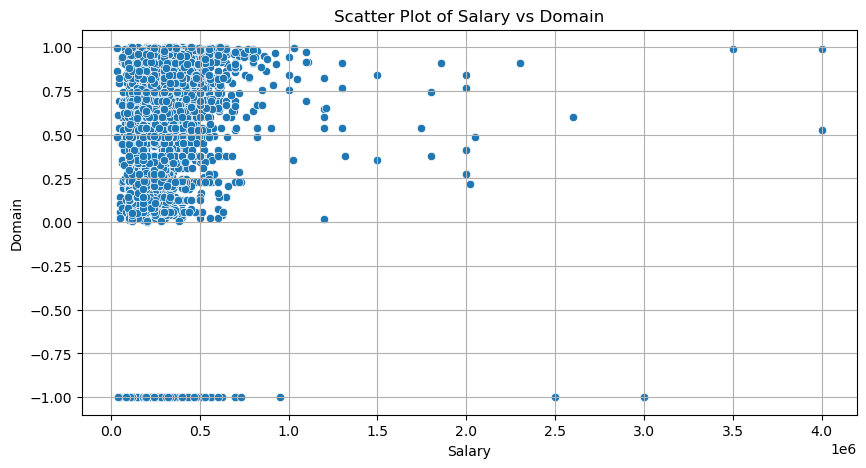

In [20]:
# Example of Bivariate Analysis: Numerical vs Numerical
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Salary', y='Domain')
plt.title('Scatter Plot of Salary vs Domain')
plt.xlabel('Salary')
plt.ylabel('Domain')
plt.grid()
plt.show()

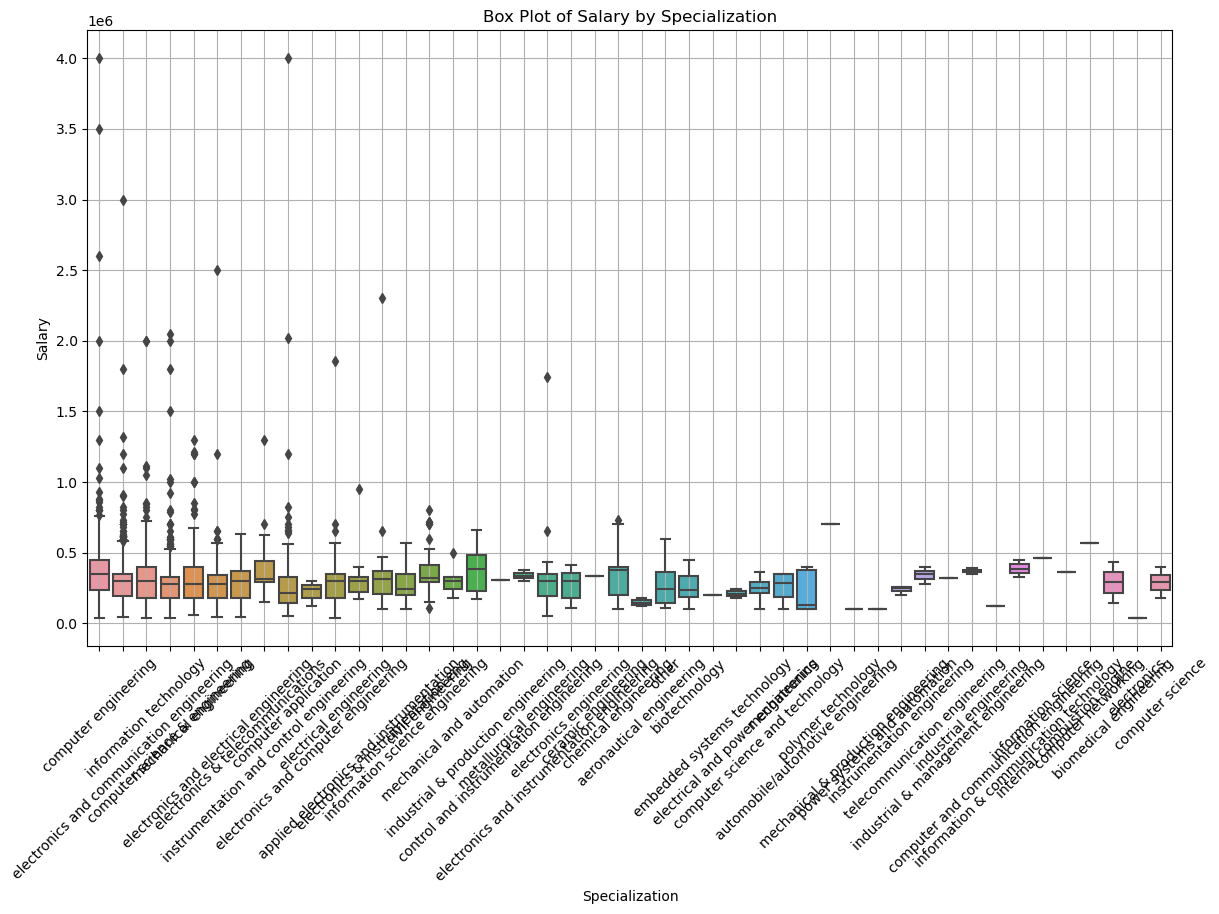

In [21]:
# Example of Bivariate Analysis: Categorical vs Numerical
# Assuming 'Specialization' is a categorical column
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Specialization', y='Salary')
plt.title('Box Plot of Salary by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid()
plt.show()

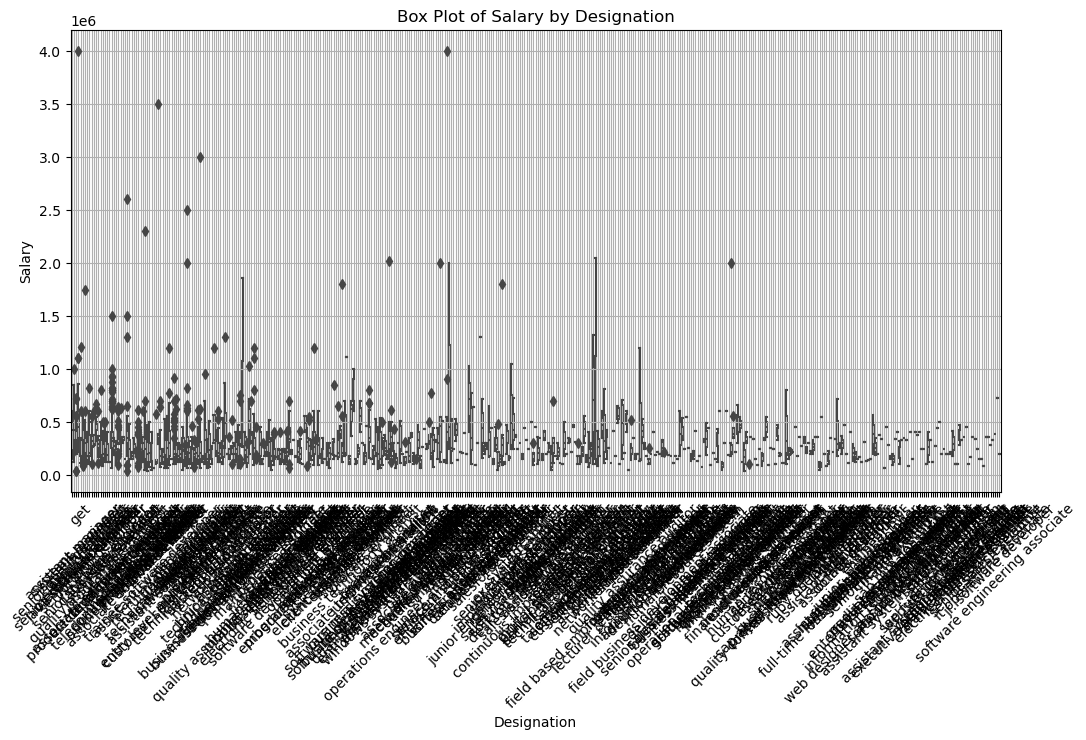

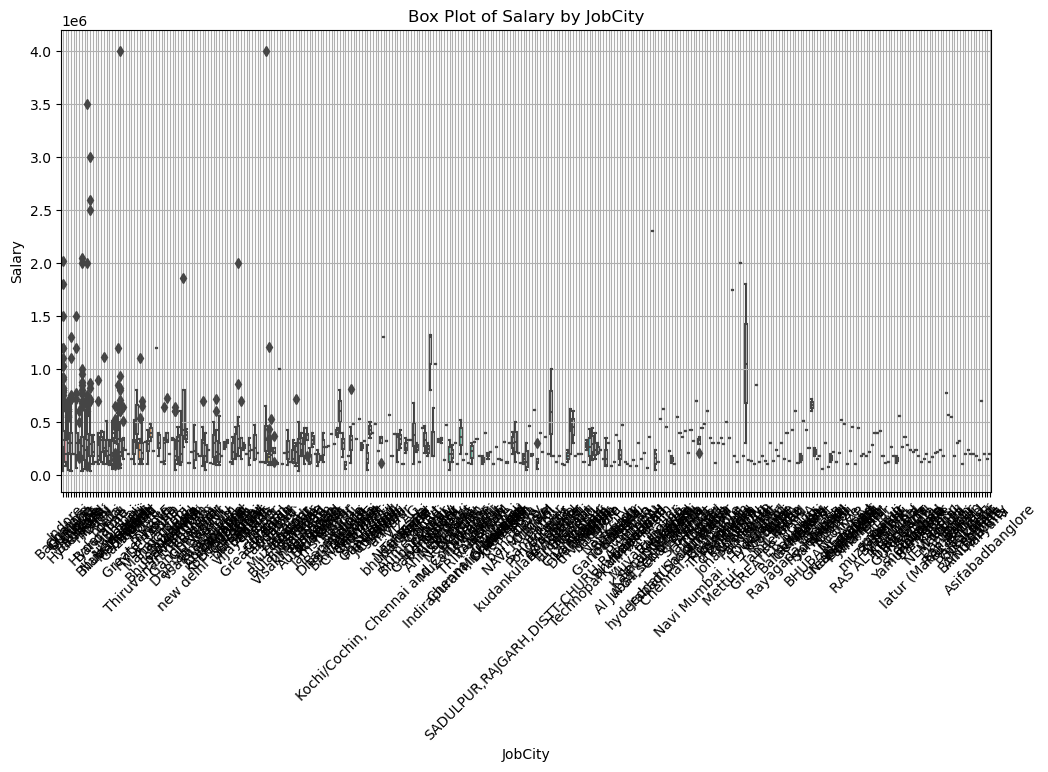

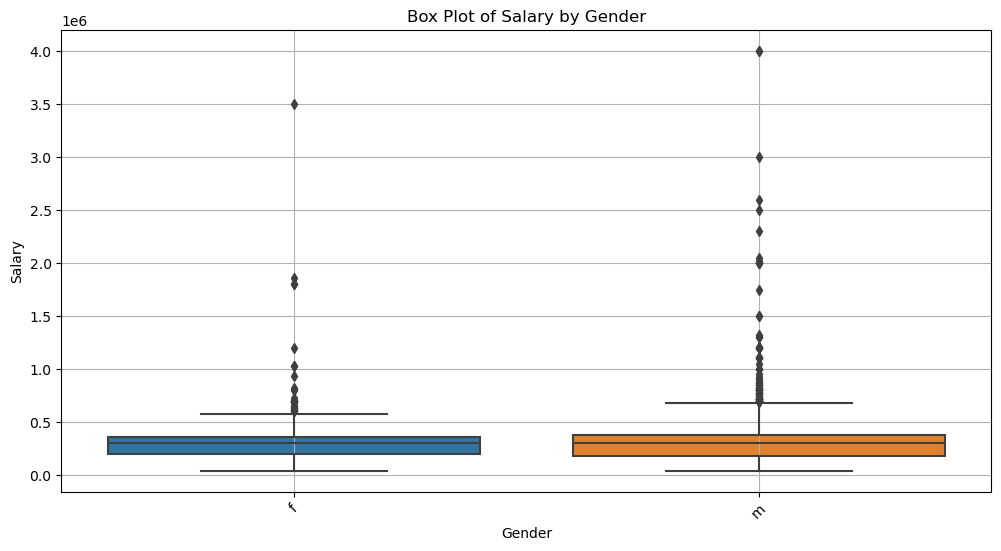

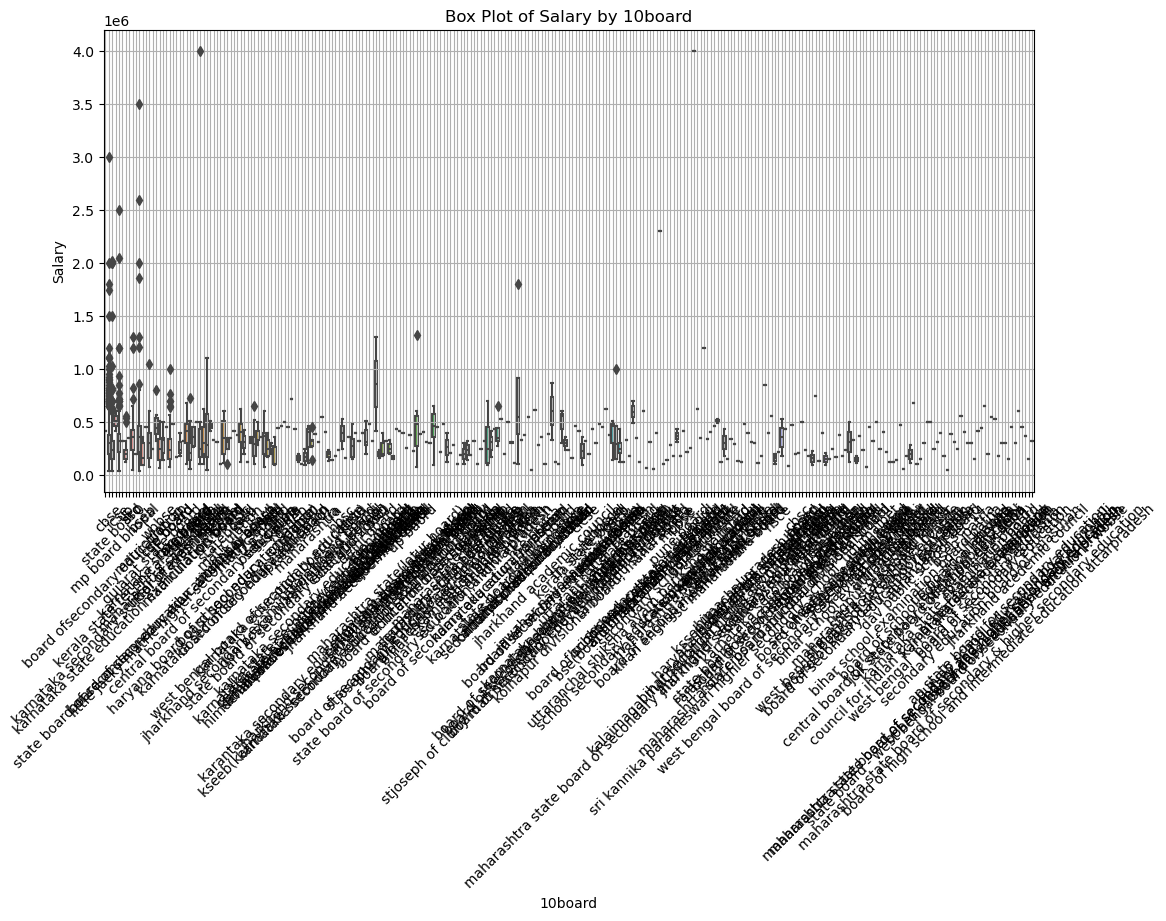

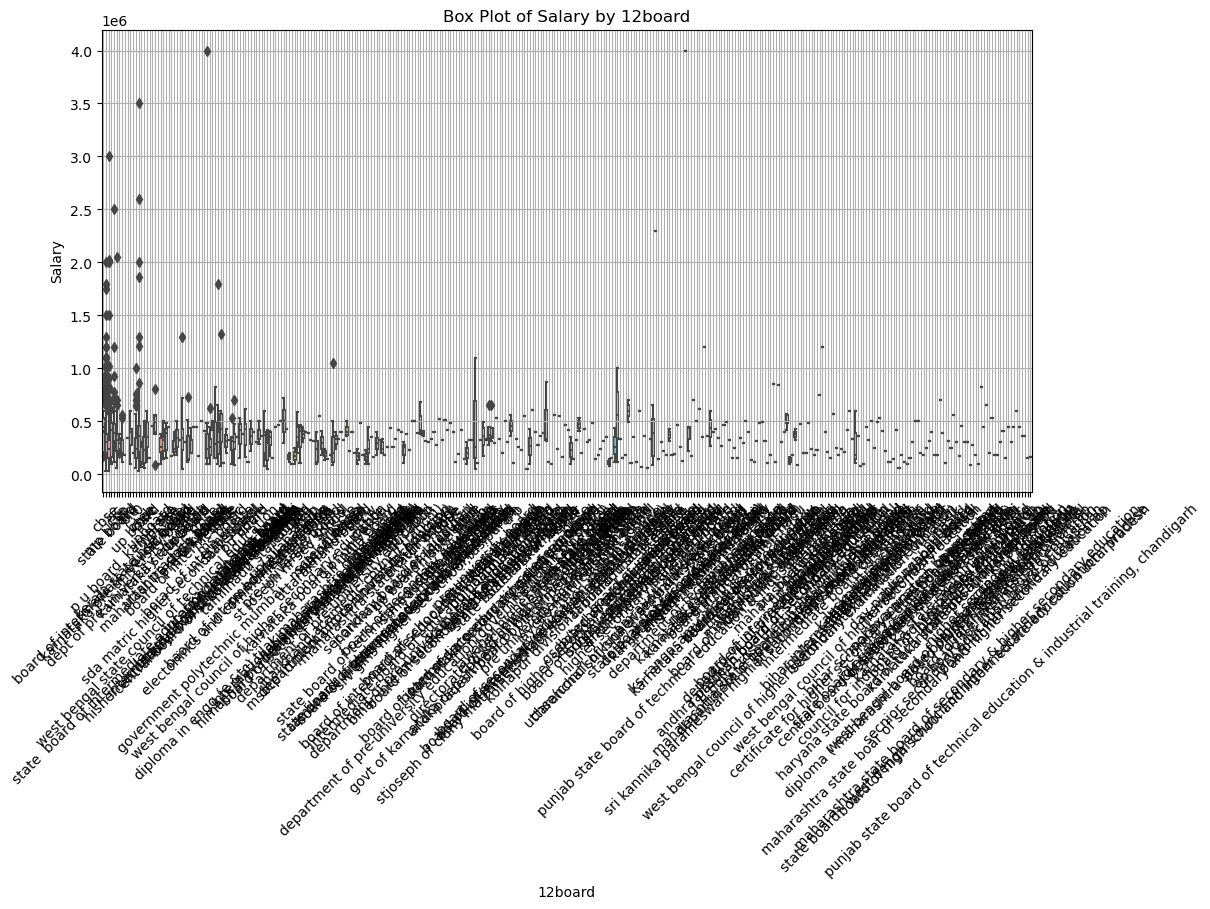

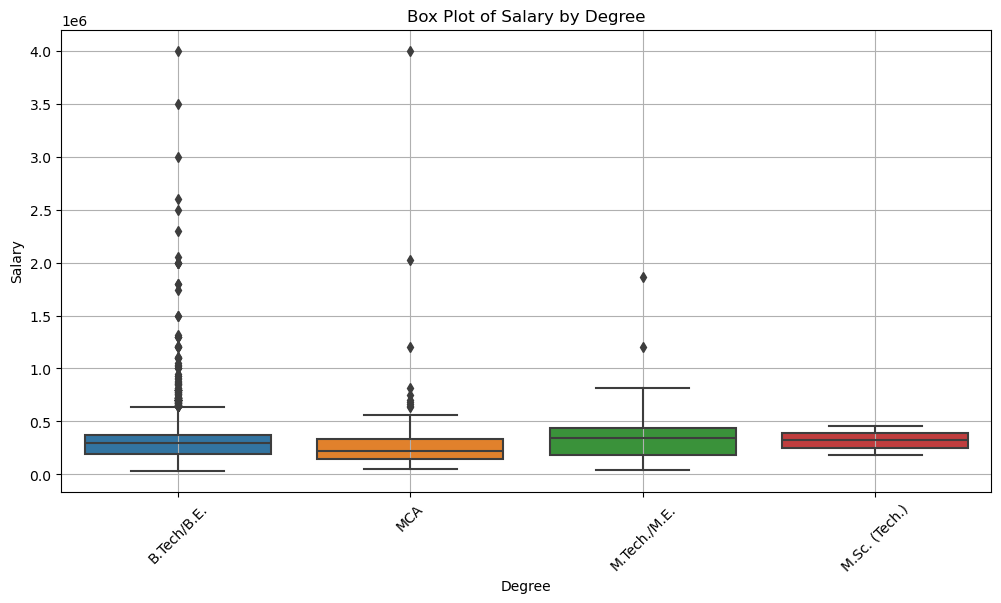

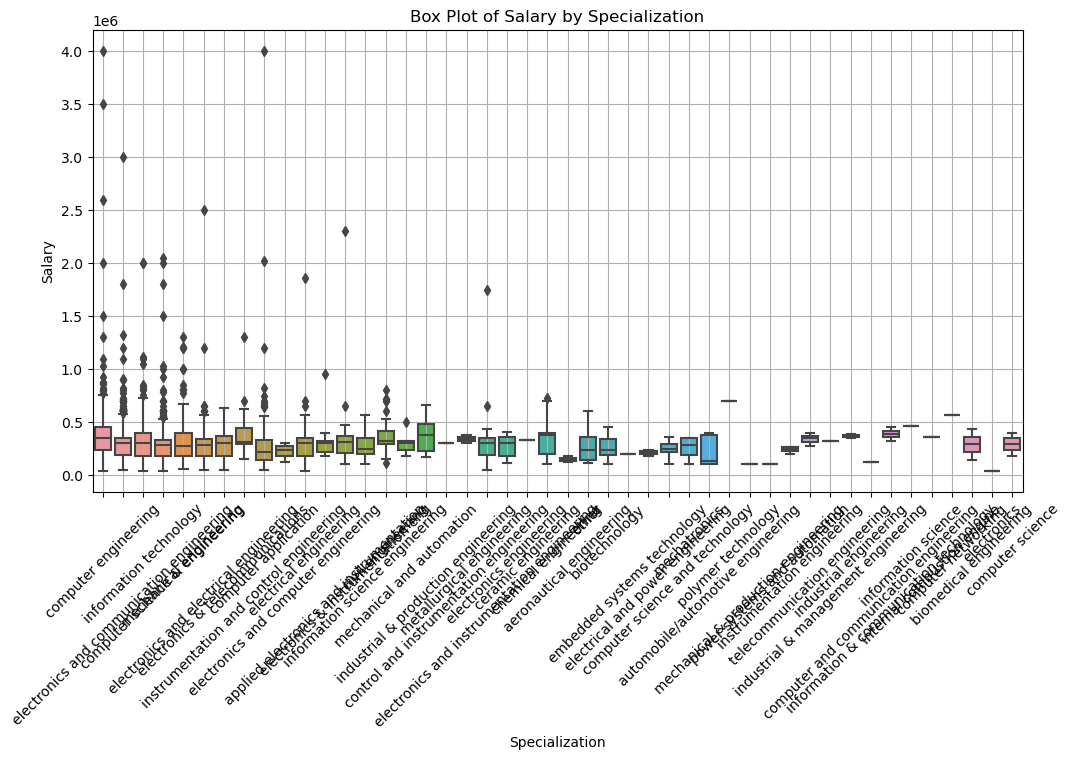

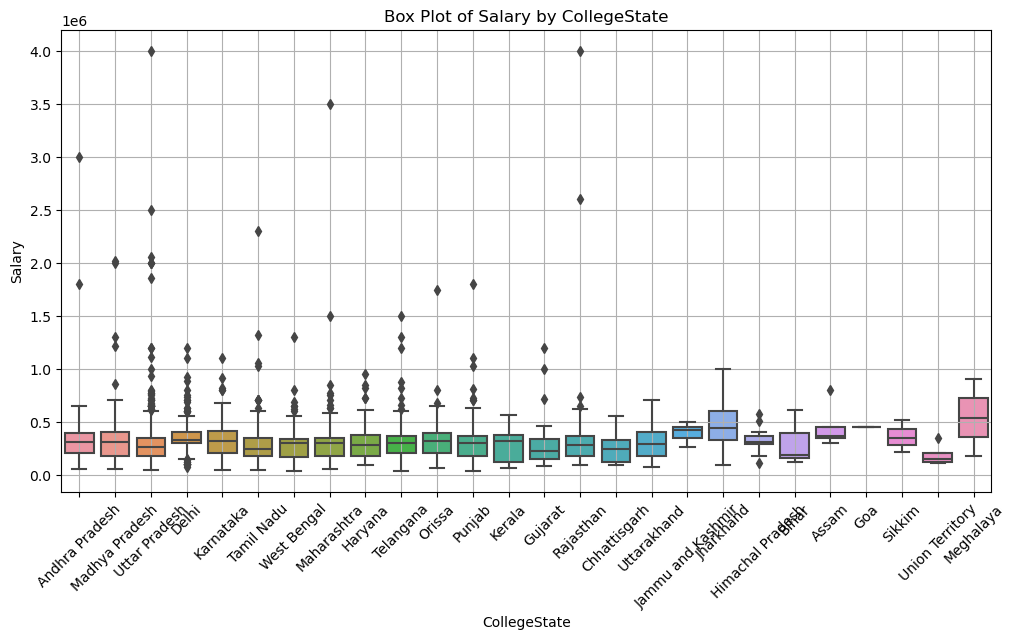

In [23]:
# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_variable = 'Salary'

# Iterate over each categorical column and create a box plot against the numerical variable
for categorical_column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=categorical_column, y=numerical_variable)
    plt.title(f'Box Plot of {numerical_variable} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_variable)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

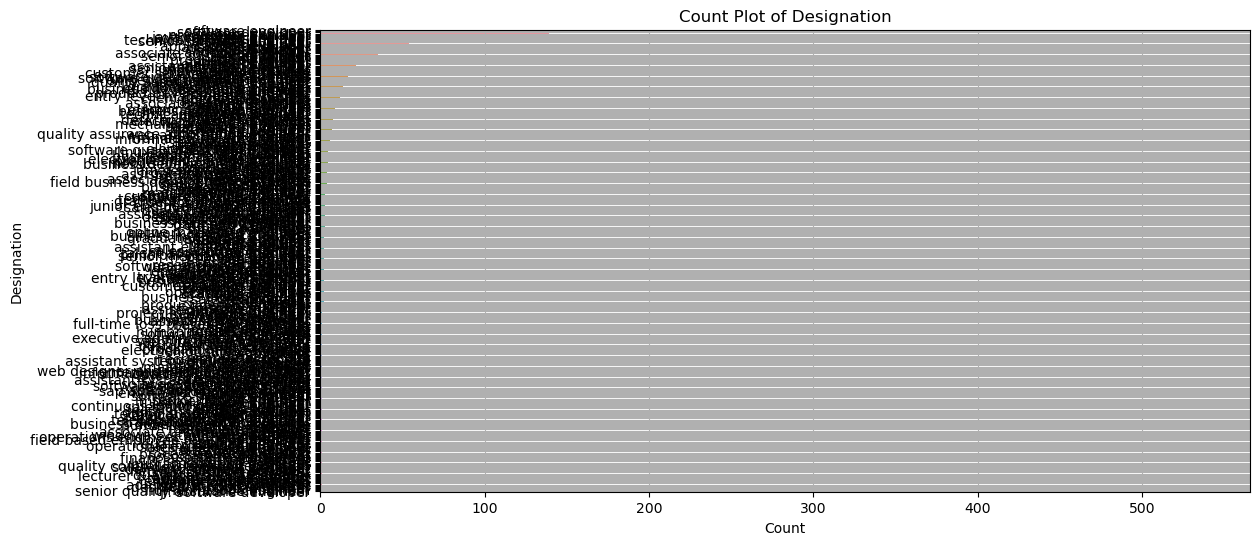

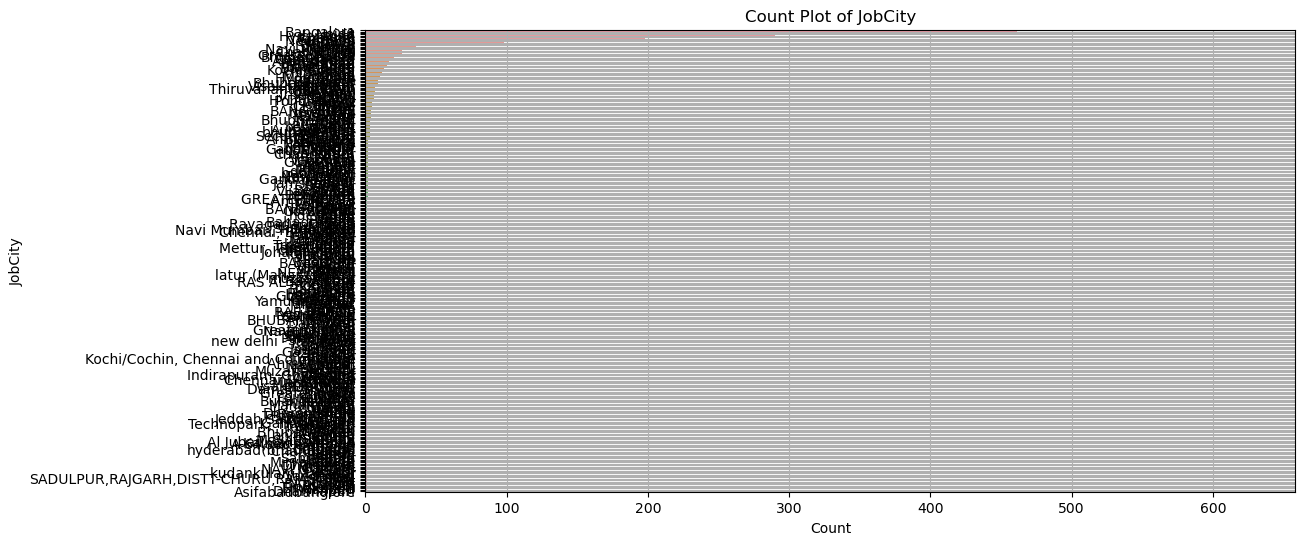

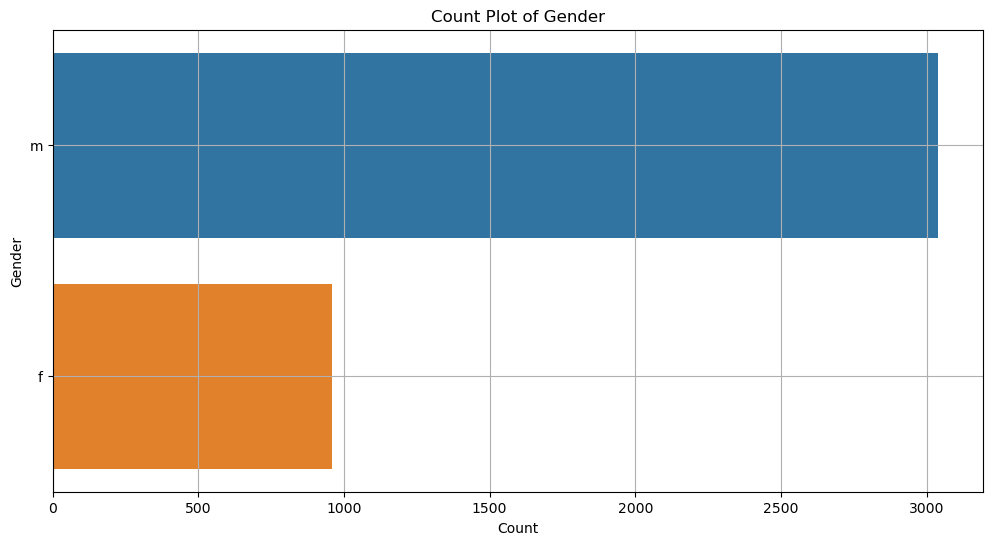

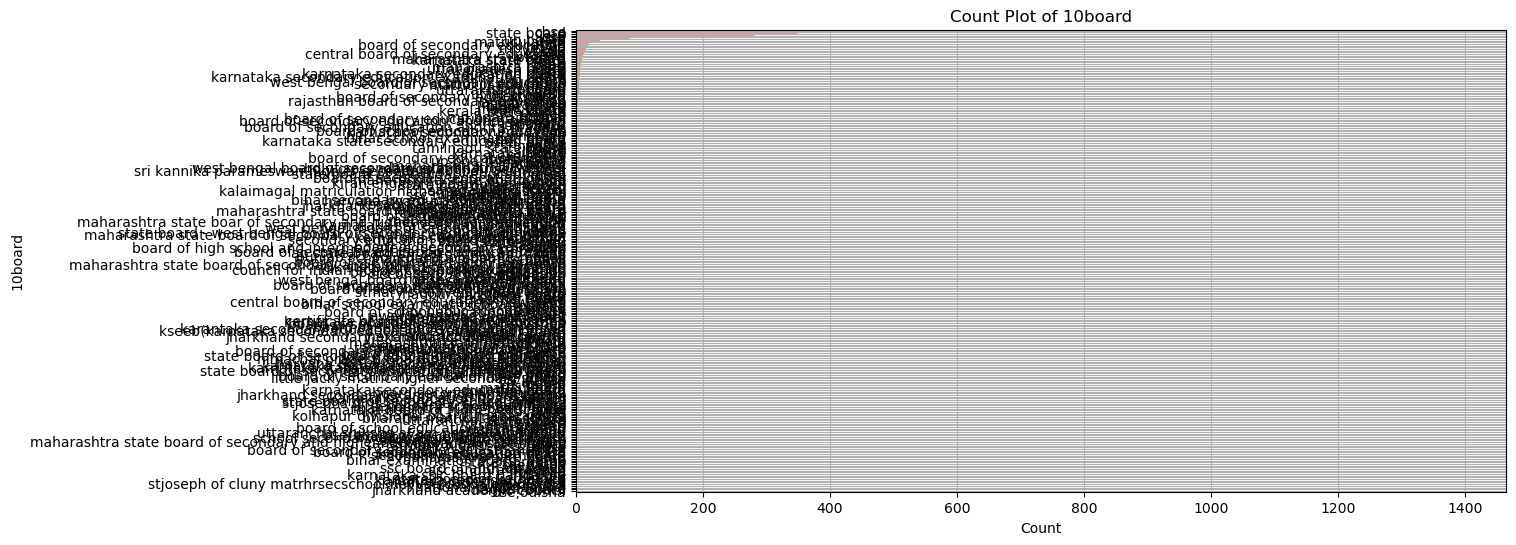

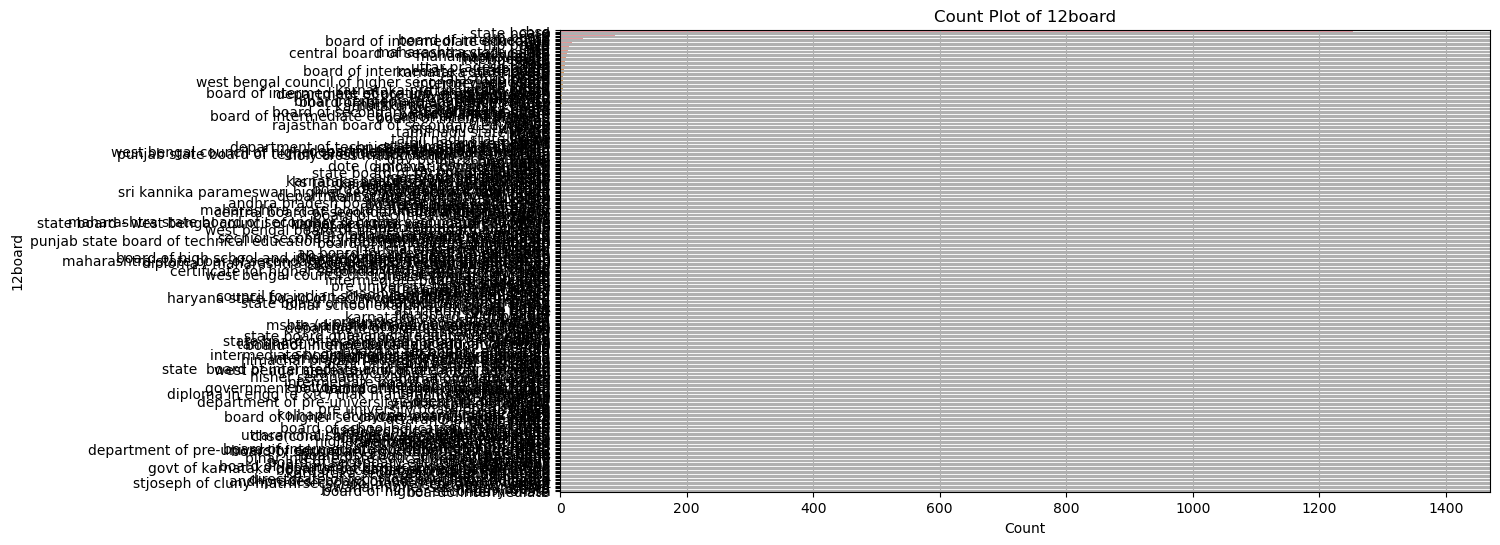

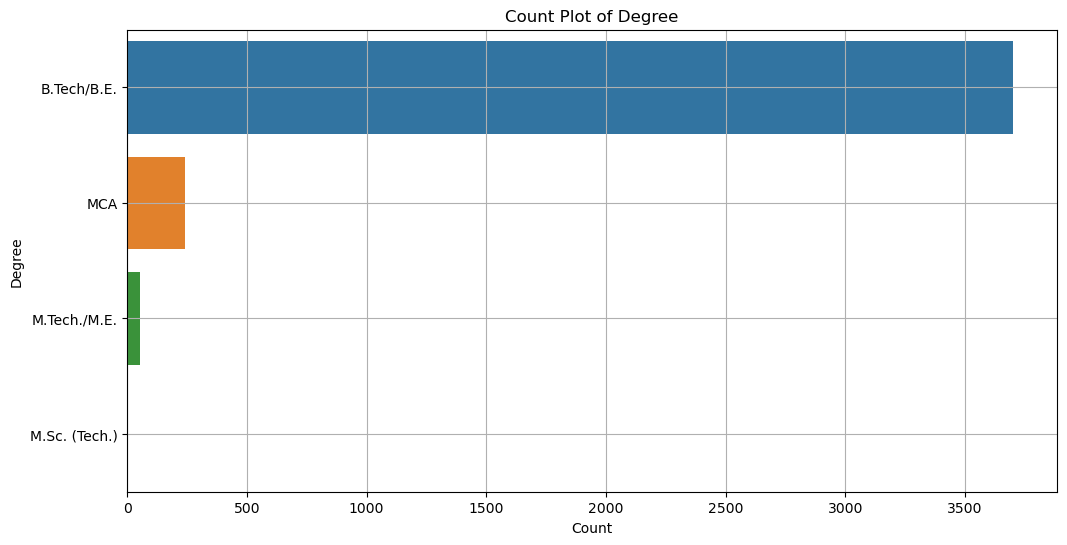

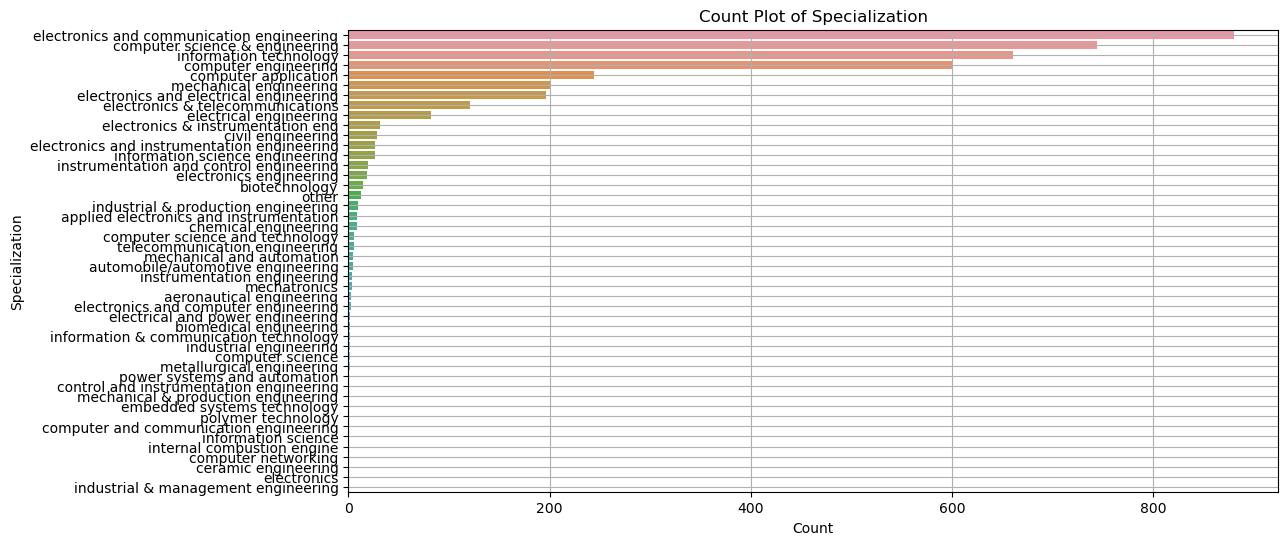

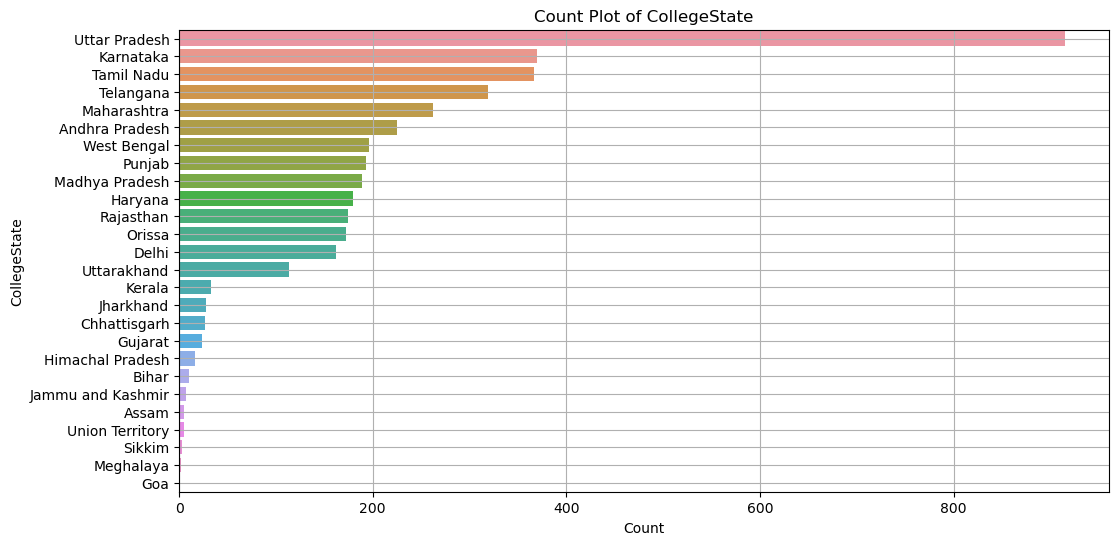

In [22]:
# Example of Bivariate Analysis: Categorical vs Categorical
categorical_columns = data.select_dtypes(include=['object']).columns

# Iterate over each categorical column and create a count plot
for categorical_column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, y=categorical_column, order=data[categorical_column].value_counts().index)
    plt.title(f'Count Plot of {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel(categorical_column)
    plt.grid()
    plt.show()